Student ID: 260570652                           MATH 387: Lab Assignment 3                                      Luke Steverango

In [2]:
import numpy as np
import math
import scipy.special as scp
import matplotlib.pyplot as pyplt 

Question 1:

We want to compute the $||{L_{n}}||$ using the Lagrange coefficients. This leads us to compute,

$$ \max_{x \in [a,b]} \lambda_{n} = \max_{x \in [a,b]} \sum_{k=0}^{n} |{\phi_{n,k}(x)}|,$$,

where $\phi_{n,k}(x)$ is k-th Lagrange basis function associated to the nodes $x_0, \dots, x_n$. For Chebyshev nodes the $\max$ occurs at $x = -1$ or $x = 1$.

<function matplotlib.pyplot.show>

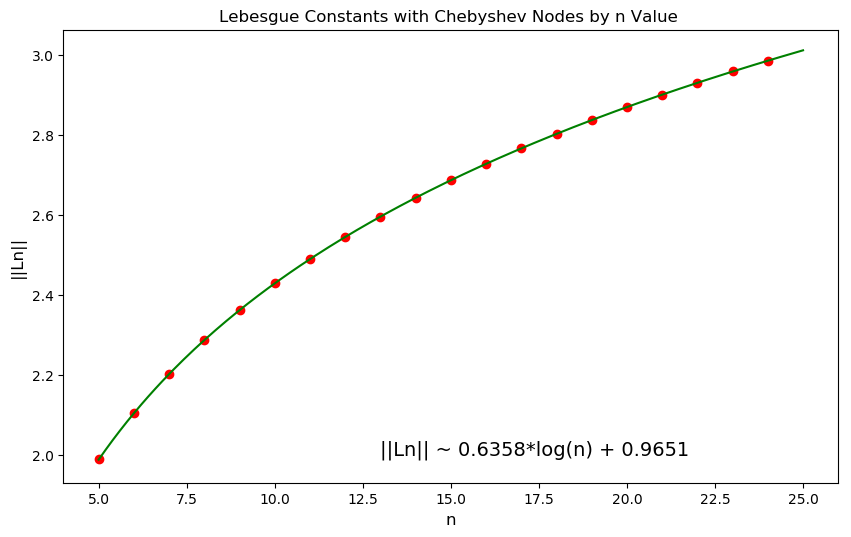

In [247]:
#Function to create the Chebyshev Nodes
def Chebfunction(n): #Function to create the Chebyshev Nodes
    cheb_nodes = []
    for x in range(1,n+1):
        a = np.cos(((2*x - 1)/(2*n))*np.pi)
        cheb_nodes.append(a)
    return cheb_nodes

#Function to create the k-th lagrange Basis Function
def LagrangeFunction(x_values,k,x): #Function to create the k-th lagrange Basis Function
    Lag_poly = 1
    for m in range(0,len(x_values)):
        if(x_values[k] != x_values[m]):
            a_m = (x - x_values[m])/(x_values[k] - x_values[m])
        else:
            a_m = 1
        Lag_poly = Lag_poly*a_m
    return Lag_poly

#Sum of the Lagrange Basis Functions
def SumofLagrangeBasis(x_values,n,x): #Sum of the Lagrange Basis Functions
    phi_nk = 0
    for m in range(0,n):
        phi_nk = phi_nk + np.abs(LagrangeFunction(x_values,m,x))
    return phi_nk

#N-list to test against
n_list = np.array(range(5,25)) 

#Y values per n value to plot per l_n
def y_values(n_values, x): 
    y_list = []
    for j in range(0,len(n_values)):
        x_values = Chebfunction(n_values[j])
        lam_k = SumofLagrangeBasis(x_values,n_values[j],x)
        y_list.append(lam_k)
    return y_list

#Plotting stuff
fit = np.polyfit(np.log(n_list), y_values(n_list,1), deg=1)
fig = pyplt.figure(figsize=(10,6), dpi=100)
log_values = fit[1] + fit[0]*np.log(np.linspace(5,25,200))
pyplt.scatter(n_list,y_values(n_list,1), color = "red")
pyplt.plot(np.linspace(5,25,200),log_values, color = "green")
pyplt.text(13,2,"||Ln|| ~ "+str(round(fit[0], 4))+"*log(n) + "+str(round(fit[1], 4)), fontsize=14)
pyplt.title("Lebesgue Constants with Chebyshev Nodes by n Value ")
pyplt.xlabel("n", size=12)
pyplt.ylabel("||Ln||", size=12)
pyplt.show

So as we can see when plotting for various $n$ values we see that $||L_{n}|| = C*\log(n)$ with a constant $C \approx 0.6358$.

Question 2:

We do a very similar approach as the above, except now we have to find the maximums attained in the outermost intervals. We employ the Secant Method to find the zeros of the derivative of the $\lambda_{n}(x)$. We basically keep running the secant method until the $\lambda_{n}^{'}(x_{n}) < \epsilon$ where $\epsilon << 1$, therefore implying $\lambda_{n}(x_{n}) \approx$ a maximum. Given below is the recursive definition of each iteration of the Secant Method.

$$ x_{n} = x_{n-1} - f(x_{n-1})\frac{x_{n-1} - x_{n-2}}{f(x_{n-1}) - f(x_{x_n-2})}$$

<function matplotlib.pyplot.show>

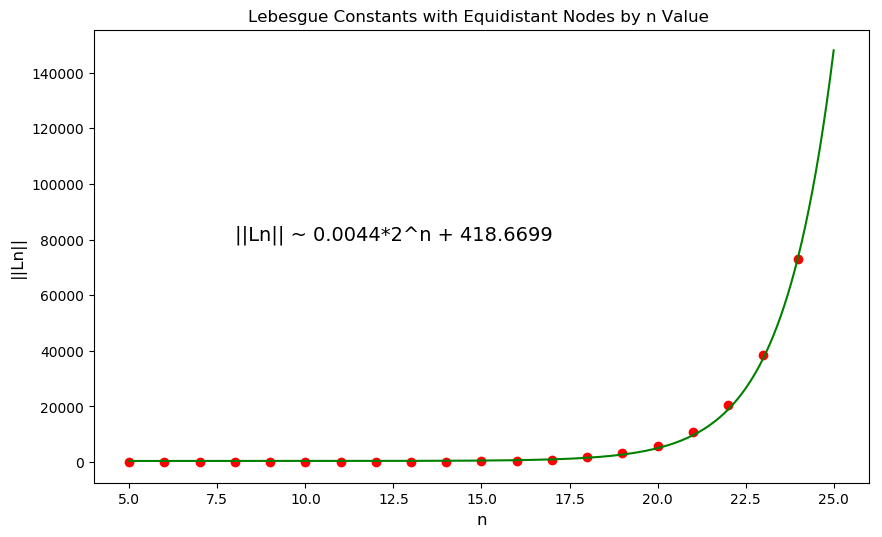

In [249]:
#Creates equidistant nodes over (-1,1)
def equidist_nodes(n):
    return np.linspace(-1,1,n)

#Computes the derivative of the Lagrange Basis Function
def dLagrangeFunction(x_values,k,x):
    Lag_poly = 1
    for m in range(0,len(x_values)):
        if(x_values[k] != x_values[m]):
            a_m = (x - x_values[m])/(x_values[k] - x_values[m])
        else:
            a_m = 1
            Lag_poly = Lag_poly*a_m  
    dLag_poly = 0
    for j in range(0,len(x_values)):
        b_m = Lag_poly/(x - x_values[j])
        dLag_poly = dLag_poly + b_m
    return dLag_poly

#Computes the Sum of the derivatives
def dSumofLagrangeBasis(x_values,n,x):
    dphi_nk = 0
    for m in range(0,n):
        dphi_nk = dphi_nk + np.sign(dLagrangeFunction(x_values,m,x))*dLagrangeFunction(x_values,m,x)
    return dphi_nk

#Specifies an epsilon value threshold to quit the Secant Method at
epsilon = 0.00001

#Runs the Secant Method on the Lagrange Derivatives
def SecantMethod(x_eval,x_values,n,epsilon):
    while np.abs(dSumofLagrangeBasis(x_values,n,x_eval)) > epsilon:
        x_eval = x_eval - dSumofLagrangeBasis(x_values,n,x_eval)*(2*epsilon**2)/((dSumofLagrangeBasis(x_values,n,x_eval+epsilon**2))-dSumofLagrangeBasis(x_values,n,x_eval-epsilon**2))
    return x_eval   

#Finds the maximum for an n value
def Maximums(n):
    nodes_used = equidist_nodes(n)
    maxima = SecantMethod((nodes_used[0] + nodes_used[1])/2, nodes_used,n, epsilon)
    return SumofLagrangeBasis(nodes_used,n,maxima)

#Makes a list of the n values
n_list = np.array(range(5,25))

#List of final values
ListofMaxima = []
for j in n_list:
    ListofMaxima.append(Maximums(j))

#Creates the y-values of L_n at each n
def y_values2(n_values,x):
    y_list2 = []
    for j in range(0,len(n_values)):
        x_values = equidist_nodes(n_values)
        lam_k = SumofLagrangeBasis(x_values,n_values[j],x)
        y_list2.append(lam_k)
    return y_list2


#Plotting Stuff
fit = np.polyfit(2**(n_list), ListofMaxima, deg=1)
fig = pyplt.figure(figsize=(10, 6), dpi=100)
function_values = fit[1] + fit[0]*2**np.linspace(5,25,200)
pyplt.scatter(n_list,ListofMaxima, color="red")
pyplt.plot(np.linspace(5,25,200),function_values, color="green")
pyplt.text(8,80000,"||Ln|| ~ "+str(round(fit[0], 4))+"*2^n + "+str(round(fit[1], 4)), fontsize=14)
pyplt.title("Lebesgue Constants with Equidistant Nodes by n Value ")
pyplt.xlabel("n", size=12)
pyplt.ylabel("||Ln||", size=12)
pyplt.show

As we can see, as n increases, $||L_{n}|| \approx C*2^{n}$ where we take $C \approx 0.0044$.

Question 3:

We now want to compute the Lebesgue constants for the Chebyshev Truncation, i.e. $||S_{n}||$. This reduces to calculating,

$$ \int^{\pi}_{0} \left|\frac{\sin((n+\frac{1}{2})\theta)}{2\sin(\frac{1}{2})}\right|d\theta, $$

for various $n$ values.

We use the Composite Trapezoidal rule to calculate the integrals. The rule is given as follows,

$$ \int^{b}_{a} f(x)dx \approx h\left[\frac{1}{2}f(x_{0}) + f(x_{1}) + \dots + f(x_{m-1}) + \frac{1}{2}f(x_{m})\right], $$

where $h = \frac{b - a}{m}$. The quadrature rule is aligned with the zeros of the polynomial, but computes over more values with equally spaced nodes.

<function matplotlib.pyplot.show>

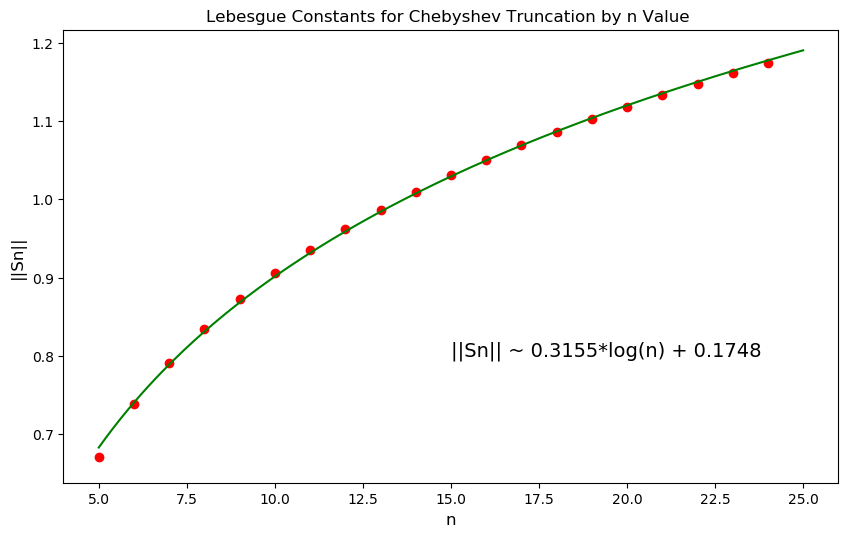

In [3]:
#Creates Equidistant Nodes
def equidist_nodes(n):
    return np.linspace(-1,1,n)

#Computes the Chebyshev Truncation Function for a given n and theta
def ChebtrucFunction(n,theta):
    return np.abs((np.sin((n+0.5)*theta))/(2*np.sin(0.5*theta)))

#Finds the zeros of the Chebyshev Function in interval (0,pi)
def zeros(n):
    zeros_list = []
    x = 1
    theta = x*np.pi/(n + 0.5)
    while(theta < np.pi):
        zeros_list.append(theta)
        x = x+1
        theta = x*np.pi/(n + 0.5)
    return zeros_list

#Finds the interval nodes per subinterval and returns a list of nodes per subinteral
def interval_nodes(s,n_list):
    interval_list = []
    for x in range(0,len(n_list)):
        if(x != len(n_list)-1):
            z = np.linspace(n_list[x],n_list[x+1],s)
            interval_list.append(z)
    return interval_list

#Converts the interval nodes list into a list of all nodes
def interval_points(n_list):
    interval_list2 = []
    for x in range(len(n_list)):
        for y in range(len(n_list[x])):
            interval_list2.append(n_list[x][y])
    return interval_list2

#Compostive Trapezoidal Rule for the function
def CompTrap(n,m):
    h = (np.pi - 0)/len(m)
    q = len(m)
    integral = h*0.5*(ChebtrucFunction(n,m[0]) + ChebtrucFunction(n,m[q-1]))
    for x in range(1,q-2):
        a = h*ChebtrucFunction(n,m[x])
        integral = integral + a
    return integral    

#List of n values to test
n_list = np.array(range(5,25))

#List of final values
ListofValues = []

#Compute the Integral Values for the n values
for j in range(len(n_list)):
    z_0 = CompTrap(n_list[j],interval_points(interval_nodes(3,zeros(n_list[j]))))
    ListofValues.append(z_0)

    
#Plotting Stuff
fit = np.polyfit(np.log(n_list), ListofValues, deg=1)
log_values1 = fit[1] + fit[0]*np.log(np.linspace(5,25,200))
fig = pyplt.figure(figsize=(10,6), dpi=100)
pyplt.scatter(n_list,ListofValues, color="red")
pyplt.plot(np.linspace(5,25,200),log_values1, color="green")
pyplt.text(15,0.8,"||Sn|| ~ "+str(round(fit[0], 4))+"*log(n) + "+str(round(fit[1], 4)), fontsize=14)
pyplt.title("Lebesgue Constants for Chebyshev Truncation by n Value ")
pyplt.xlabel("n", size=12)
pyplt.ylabel("||Sn||", size=12)
pyplt.show

As you can see for various values of n, $||S_n|| = C*\log(n)$ where we take $C \approx 0.3155$.

Question 3:

We now do the same as in question 3 with equally spaced nodes, but now we want to calculate when given Legendre polynomials defined over $(-1,1)$. To compute the Lebesgue constants for the Legendre truncation, $||S_{n}||$ we evaluate, 

$$\int^{1}_{-1} \left|\sum^{n}_{k=0} a_{k}P_k(x)\right|dx,$$

where $P_k = \frac{1}{2^n}\sum_{k=0}^{n}{N\choose k}^2(x-1)^{n-k}(x+1)^{k}$ and the $a_k = \frac{2k + 1}{2}$. We again use the composite trapezoidal rule to evaluate the integrals.

<function matplotlib.pyplot.show>

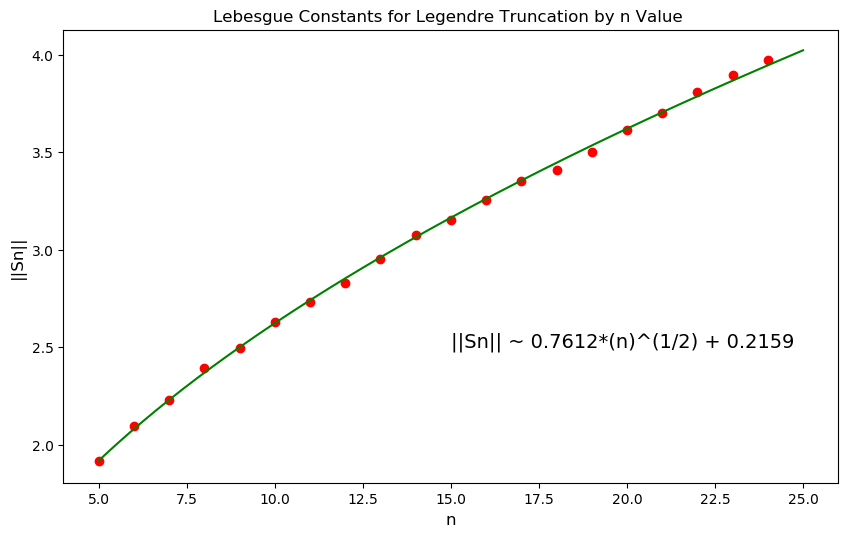

In [253]:
#Makes the legendre Polynomials for given x in (-1,1) and n
def LegendrePoly(x,n):
    lg = 0
    for j in range (n+1):
        a = (2*j+1)/2
        y = a*(((scp.binom(n,j))**2)*((x-1)**(n-j))*((x+1)**j))
        lg = lg + y
    return np.abs((lg/(2**n)))

#Composite Trapezoidal for Legendre Polynomials
def CompTrap1(n,m):
    h = 2/(len(m))
    integral = h*0.5*(LegendrePoly(-1,n) + LegendrePoly(1,n))
    for j in range(0,len(m)-2):
        a = h*LegendrePoly(m[j],n)
        integral = integral + a
    return integral    

#Computes the interval points for integral
def interval_points(n):
    z_list = np.linspace(-1,1,5*n)
    return z_list

#List of n values to test
n_list = np.array(range(5,25))

#List of final values
ListofValues1 = []

#Computes the y-values per n value
for j in range(len(n_list)):
    p = interval_points(n_list[j])
    q = CompTrap1(n_list[j],p)
    ListofValues1.append(q)

#Plotting Stuff
fit = np.polyfit(np.sqrt(n_list), ListofValues1, deg=1)
function_values2 = fit[1] + fit[0]*np.sqrt(np.linspace(5,25,200))
fig = pyplt.figure(figsize=(10,6), dpi=100)
pyplt.scatter(n_list,ListofValues1, color="red")
pyplt.plot(np.linspace(5,25,200),function_values2, color="green")
pyplt.text(15,2.5,"||Sn|| ~ "+str(round(fit[0], 4))+"*(n)^(1/2) + "+str(round(fit[1], 4)), fontsize=14)
pyplt.title("Lebesgue Constants for Legendre Truncation by n Value ")
pyplt.xlabel("n", size=12)
pyplt.ylabel("||Sn||", size=12)
pyplt.show

As you cans see for various $n$ values we get $||S_n|| = C*\sqrt(n)$ where we take $C \approx 0.7612$.

Question 5:

We now want to check the Newton Cotes formula and calculate the "Lebesgue Constant" for various n. This then means we need to evaluate as seen in the Theory assignment, 

$$\sum^{n}_{k=0} \left| \int^{b}_{a} \phi_{n,k}(x)dx\right|,$$

where $\phi_{n,k}(x)$ has been defined previously. We use more nodes to calculate the integral then for the nodes defined as the interpolation points.

<function matplotlib.pyplot.show>

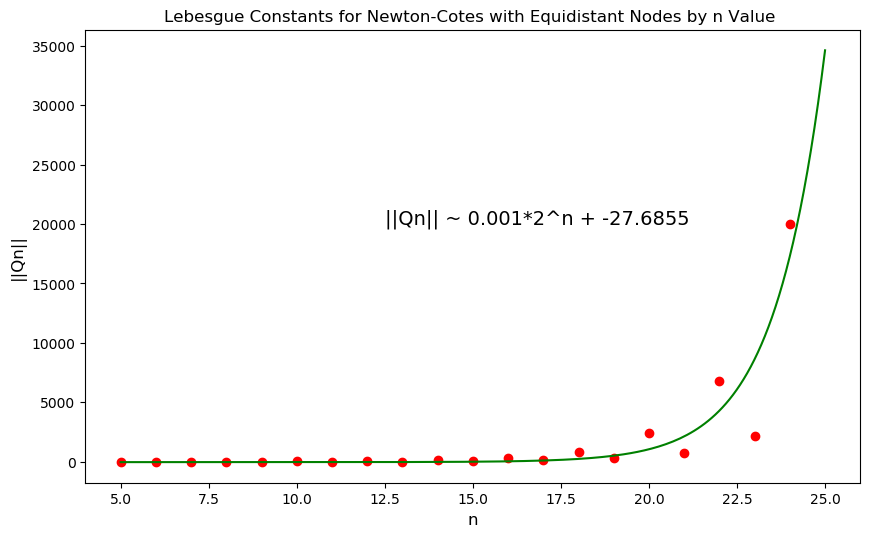

In [254]:
#Lagrange Function Creator as before
def LagrangeFunction(x_values,k,x):
    Lag_poly = 1
    for m in range(0,len(x_values)):
        if(x_values[k] != x_values[m]):
            a_m = (x - x_values[m])/(x_values[k] - x_values[m])
        else:
            a_m = 1
        Lag_poly = Lag_poly*a_m
    return Lag_poly

#Composite Trapezoidal for the Lagrange Function
def CompTrap2(nodes_list,nodes_list2,k,n,x):
    h = 1/(n+1)
    integral = h*0.5*(LagrangeFunction(nodes_list,k,0) + LagrangeFunction(nodes_list,k,1))
    for j in range(0,len(nodes_list)):
        a = h*LagrangeFunction(nodes_list2,k,nodes_list[j])
        integral = integral + a
    return np.abs(integral)    

#Equally Spaced Nodes for the Lagrange Function
def interval_points2(n):
    z_list = np.linspace(0,1,n+1)
    return z_list

#Calculates the Sum of the Integrals in the formula
def SumofIntegrals(nodes_list,nodes_list2,n,x):
    sum_int = 0
    for y in range(n):
        sum_int = sum_int + CompTrap2(nodes_list,nodes_list2,y,n,x)
    return sum_int

#List of n values to test
n_list = np.array(range(5,25))
#Integral Values to test over
int_values = np.linspace(0,1,100)

#List of final values
ListofValues2 = []

#Calculates the y-values for each n
for j in range(len(n_list)):
    p = interval_points2(n_list[j])
    q = SumofIntegrals(int_values,interval_points2(n_list[j]),n_list[j],0.5)
    ListofValues2.append(q)

#Plotting Stuff
fit = np.polyfit(2**(n_list), ListofValues2, deg=1)
function_values3 = fit[1] + fit[0]*2**(np.linspace(5,25,200))
fig = pyplt.figure(figsize=(10,6), dpi=100)
pyplt.scatter(n_list,ListofValues2, color="red")
pyplt.plot(np.linspace(5,25,200),function_values3, color="green")
pyplt.text(12.5,20000,"||Qn|| ~ "+str(round(fit[0], 4))+"*2^n + "+str(round(fit[1], 4)), fontsize=14)
pyplt.title("Lebesgue Constants for Newton-Cotes with Equidistant Nodes by n Value ")
pyplt.xlabel("n", size=12)
pyplt.ylabel("||Qn||", size=12)
pyplt.show

As we can see, as n increases my guess for functional dependence is $||Q_{n}|| \approx C*2^{n}$ where we take $C \approx 0.0001$.